In [7]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
import time
from collections import Counter

X_min = None
X_max = None
# scale data
def scale(X):
    return (X - X_min)/(X_max-np.min(X, axis=0))

# update parameters
def sgd(cost, params, lr=0.01):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        updates.append([p, p - g * lr])
    return updates

def shuffle_data (samples, labels):
    idx = np.arange(samples.shape[0])
    np.random.shuffle(idx)
    #print  (samples.shape, labels.shape)
    samples, labels = samples[idx], labels[idx]
    return samples, labels

def read_data(filename):
    """
    Reading the file and return scaled features and labels
    """
    input_data = np.loadtxt(filename,delimiter=' ')
    X, _Y = input_data[:,:36], input_data[:,-1].astype(int)
    
    _Y[_Y == 7] = 6
    Y = np.zeros((_Y.shape[0], 6))
    Y[np.arange(_Y.shape[0]), _Y-1] = 1
    
    return X, Y

In [8]:
# Prepare Data
trainX, trainY = read_data('sat_train.txt')
testX, testY = read_data('sat_test.txt')

# Use min max value of traning data to do scaling
X_min = np.min(trainX, axis=0)
X_max = np.max(trainX, axis=0)

trainX = scale(trainX)
testX = scale(testX)
    
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(4435, 36) (4435, 6)
(2000, 36) (2000, 6)


In [9]:
def plot_his(c, pic_name, title):
    x = list(c.keys())
    y = c.values()

    # plot the histogram
    fig, ax = plt.subplots(figsize=(10,6))
    rect = ax.bar(x,y,align='center') # A bar chart
    plt.title(title)
    plt.xlabel('Class of labels')
    plt.ylabel('Number of Samples')
    # for i in range(len(y)):
    #     plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % (int(height)),
                    ha='center', va='bottom')

    autolabel(rect)
    plt.savefig(pic_name)
    plt.show()
    plt.close()

In [ ]:
plot_his(Counter(trainY.argmax(axis=1)), "./graph/train_label_distribution.png", "Distribution of label classes in traning dataset")

In [ ]:
plot_his(Counter(testY.argmax(axis=1)), "./graph/test_label_distribution.png", "Distribution of label classes in test dataset")

In [ ]:
plot_his(Counter(np.concatenate([trainY,testY]).argmax(axis=1)), "./graph/total_label_distribution.png", "Distribution of label classes in the whole dataset")

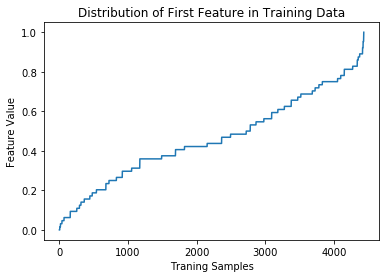

In [20]:
# After Scaling
plt.plot(sorted(trainX[:,0]))
plt.title("Distribution of First Feature in Training Data")
plt.xlabel("Traning Samples")
plt.ylabel("Feature Value")
plt.savefig("./graph/dis_training_feature0.png")
plt.show()
plt.close()